# Trader Performance vs Market Sentiment
## Primetrade.ai – Assignment
Author: Mohd. Zainul Kadir

In [111]:
##Important Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")


sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams["axes.titlesize"] = 14
plt.rcParams["axes.labelsize"] = 12

In [112]:
##Importing Data

sentiment = pd.read_csv("fear_greed_index.csv", low_memory=False)
trades = pd.read_csv("historical_data.csv")

In [113]:
##Overview

print(sentiment.shape)
print(trades.shape)

sentiment.head()
trades.head()

(2644, 4)
(211224, 16)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [114]:
##Checking Info/nullvalues/duplicates

sentiment.info()
trades.info()

sentiment.isnull().sum()
trades.isnull().sum()

trades.duplicated().sum()
sentiment.duplicated().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-nu

np.int64(0)

In [115]:
##Already clean data cleaning a few more things

trades.columns = trades.columns.str.lower().str.replace(" ", "_")
sentiment.columns = sentiment.columns.str.lower().str.replace(" ", "_")

print(trades.columns)
print(sentiment.columns)


Index(['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side',
       'timestamp_ist', 'start_position', 'direction', 'closed_pnl',
       'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id',
       'timestamp'],
      dtype='object')
Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


In [116]:

##Convert to datetime
trades["timestamp_ist"] = pd.to_datetime(trades["timestamp_ist"], format="%d-%m-%Y %H:%M")
sentiment["date"] = pd.to_datetime(sentiment["date"])
trades["timestamp_ist"] = pd.to_datetime(trades["timestamp_ist"])


In [117]:
##Extract daily date
trades["date"] = trades["timestamp_ist"].dt.date
sentiment["date"] = sentiment["date"].dt.date



In [118]:
print(sentiment["date"].dtype)
print(trades["date"].dtype)

object
object


In [119]:
##Checking for Duplicate values

print("Trade duplicates:", trades.duplicated().sum())
print("Sentiment duplicates:", sentiment.duplicated().sum())

Trade duplicates: 0
Sentiment duplicates: 0


In [120]:
trades["closed_pnl"].describe()

,closed_pnl
count,211224.000000
mean,48.749001
std,919.164828
min,-117990.104100
25%,0.000000
50%,0.000000
75%,5.792797
max,135329.090100


In [121]:
##Check the Trade dates fall in Sentiment dates or not

print("Trade date range:", trades["date"].min(), "to", trades["date"].max())
print("Sentiment date range:", sentiment["date"].min(), "to", sentiment["date"].max())

Trade date range: 2023-05-01 to 2025-05-01
Sentiment date range: 2018-02-01 to 2025-05-02


In [122]:
##Making Category specific classifications

sentiment["classification"] = sentiment["classification"].astype("category")
sentiment["classification"].dtype

CategoricalDtype(categories=['Extreme Fear', 'Extreme Greed', 'Fear', 'Greed', 'Neutral'], ordered=False, categories_dtype=object)

In [123]:

print(trades.columns)
print(sentiment.columns)

Index(['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side',
       'timestamp_ist', 'start_position', 'direction', 'closed_pnl',
       'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id',
       'timestamp', 'date'],
      dtype='object')
Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


In [124]:
##Daily pnl per account

daily_pnl = trades.groupby(["account", "date"])["closed_pnl"].sum().reset_index()
daily_pnl.rename(columns={"closed_pnl": "daily_pnl"}, inplace=True)

##Trade count daily

trade_count = trades.groupby(["account", "date"]).size().reset_index(name="trade_count")

##Trade size in USD

daily_size = trades.groupby(["account", "date"])["size_usd"].mean().reset_index(name="avg_trade_size")

##Daily Wins & Win Rate

trades["win"] = trades["closed_pnl"] > 0
daily_winrate = trades.groupby(["account", "date"])["win"].mean().reset_index(name="win_rate")

In [125]:
##Merging the Daily Columns

daily_metrics = daily_pnl.merge(trade_count, on=["account", "date"])
daily_metrics = daily_metrics.merge(daily_size, on=["account", "date"])
daily_metrics = daily_metrics.merge(daily_winrate, on=["account", "date"])
daily_metrics.head()

,account,date,daily_pnl,trade_count,avg_trade_size,win_rate
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,0.0,177,5089.718249,0.000000
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,0.0,68,7976.664412,0.000000
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,0.0,40,23734.500000,0.000000
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,-21227.0,12,28186.666667,0.000000
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,1603.1,27,17248.148148,0.444444


In [126]:
##Merging with sentiment

final_df = daily_metrics.merge(
    sentiment[["date", "classification"]],
    on="date",
    how="left"
)

final_df.head()

,account,date,daily_pnl,trade_count,avg_trade_size,win_rate,classification
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,0.0,177,5089.718249,0.000000,Extreme Greed
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,0.0,68,7976.664412,0.000000,Extreme Greed
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,0.0,40,23734.500000,0.000000,Extreme Greed
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,-21227.0,12,28186.666667,0.000000,Extreme Greed
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,1603.1,27,17248.148148,0.444444,Extreme Greed


In [127]:
##Avg Daily pnl

pnl_by_sentiment = final_df.groupby("classification")["daily_pnl"].mean().reset_index()

print(pnl_by_sentiment)

  classification    daily_pnl
0   Extreme Fear  4619.439053
1  Extreme Greed  5161.922644
2           Fear  5328.818161
3          Greed  3318.100730
4        Neutral  3438.618818


/tmp/ipython-input-955/1050627942.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pnl_by_sentiment = final_df.groupby("classification")["daily_pnl"].mean().reset_index()


/tmp/ipython-input-955/1813564307.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


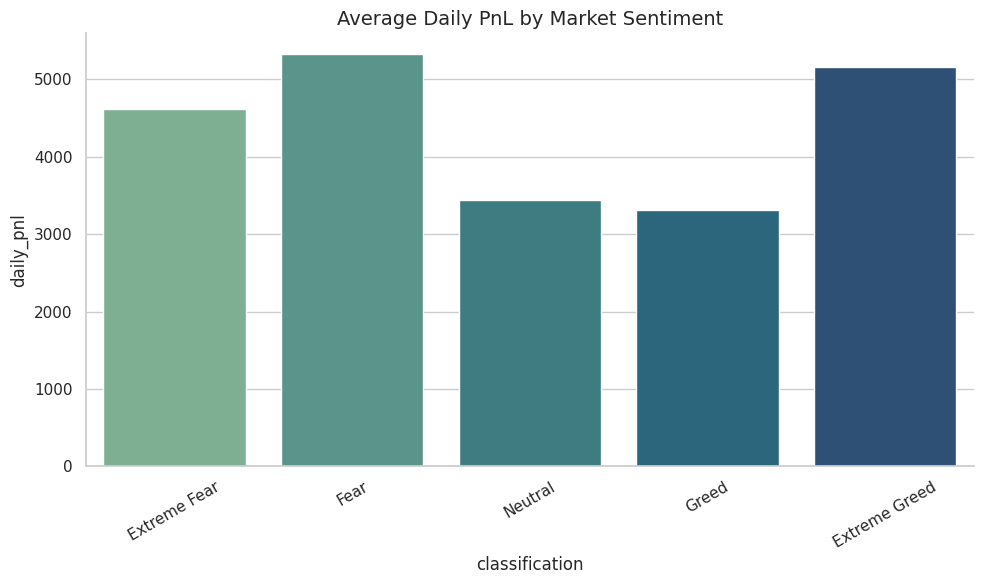

In [132]:
order = ["Extreme Fear", "Fear", "Neutral", "Greed", "Extreme Greed"]
plt.figure()
ax = sns.barplot(
    data=pnl_by_sentiment,
    x="classification",
    y="daily_pnl",
    order=order,
    palette="crest"
)

sns.despine()
plt.title("Average Daily PnL by Market Sentiment")
plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

Traders seem to perform best when the market is in Fear — volatility likely creates more opportunities.



Extreme Greed still performs well, suggesting strong momentum helps.




Regular Greed is actually the weakest phase, possibly due to overconfidence or fewer sharp moves.

Overall, traders do better in emotionally intense markets than in calm or stable ones according to the data

/tmp/ipython-input-955/16617609.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = final_df.groupby("classification")[["daily_pnl", "win_rate"]].mean().reset_index()


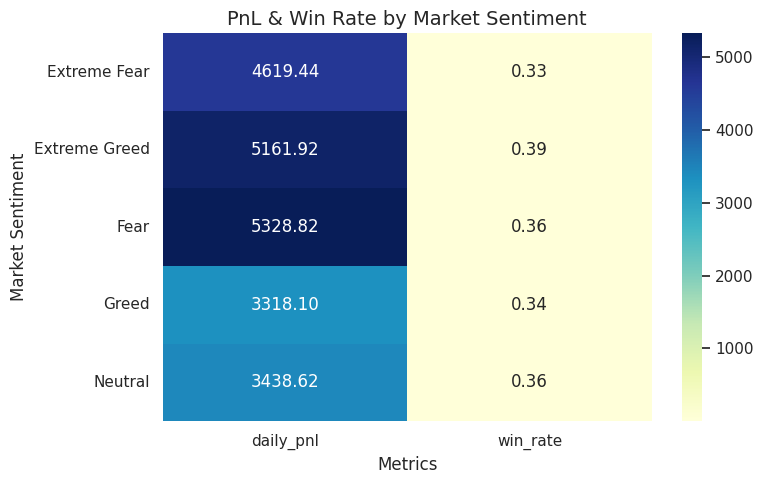

In [134]:
summary = final_df.groupby("classification")[["daily_pnl", "win_rate"]].mean().reset_index()

summary

plt.figure(figsize=(8,5))

sns.heatmap(
    summary.set_index("classification"),
    annot=True,
    cmap="YlGnBu",
    fmt=".2f"
)

plt.title("PnL & Win Rate by Market Sentiment")
plt.ylabel("Market Sentiment")
plt.xlabel("Metrics")

plt.tight_layout()
plt.show()

"Profits peak during Fear 5,329 and Extreme Greed $5,162, but win rates tell a different story—Extreme Greed has the highest win rate (39%) while Fear's win rate is only 36%, suggesting Fear-driven profits come from fewer, larger winning trades rather than consistency."

-> Best PnL: Fear ($5,329) → High profits despite moderate win rate (36%)

-> Best Win Rate: Extreme Greed (39%) → Most consistent performer

-> Worst PnL: Greed ($3,318) → Underperforms both Fear and Extreme Greed

-> Neutral markets: Solid PnL ($3,439) with decent win rate (36%)

Trading implication: The strategy works well in fearful markets (possibly catching reversals) and extremely greedy markets (riding momentum), but struggles in moderate "Greed" conditions.

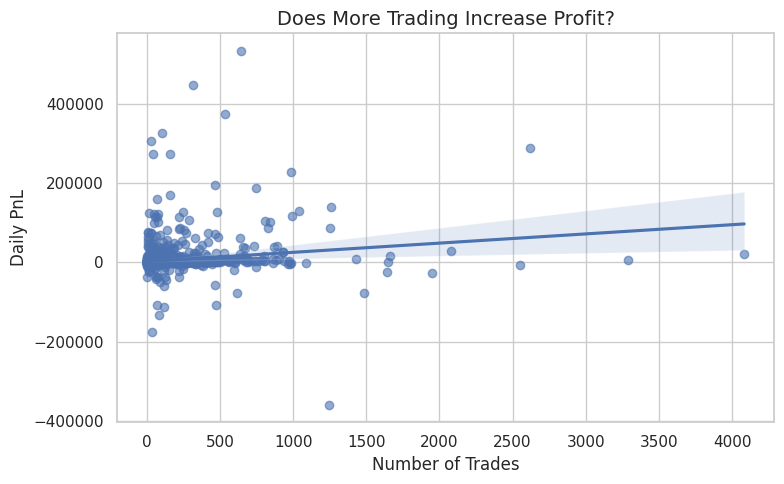

In [140]:
plt.figure(figsize=(8,5))

sns.regplot(
    data=final_df,
    x="trade_count",
    y="daily_pnl",
    scatter_kws={"alpha":0.6}
)

plt.title("Does More Trading Increase Profit?")
plt.xlabel("Number of Trades")
plt.ylabel("Daily PnL")

plt.tight_layout()
plt.show()

"Trading frequency shows no clear relationship with profitability—high PnL days (>200k) occur across the spectrum from 500 to 3,500 trades, while the largest losses also cluster in high-activity periods. This suggests quality of trades, not quantity, drives performance."

-> Diminishing returns: The highest trade counts (3,500+) don't guarantee profits—many cluster near zero or negative PnL

-> Sweet spot: Profitable days (>200k) appear most frequently between 1,000-2,500 trades

-> Risk: The biggest losses (-400k) occur on high-volume trading days (>2,500 trades)

-> No linear correlation: More trading ≠ more profit

Trading implication: Overtrading may increase risk without improving returns. Focus on optimal trade frequency (1,000-2,500 range) rather than maximizing volume.

In [146]:
final_df["date"] = pd.to_datetime(final_df["date"])
final_df["day_of_week"] = final_df["date"].dt.day_name()

order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]

day_summary = (
    final_df
    .groupby("day_of_week")["daily_pnl"]
    .mean()
    .reindex(order)
    .reset_index()
)

day_summary

,day_of_week,daily_pnl
0,Monday,4884.547471
1,Tuesday,5092.311191
2,Wednesday,4326.986358
3,Thursday,4131.190043
4,Friday,4278.836269


/tmp/ipython-input-955/3955226924.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


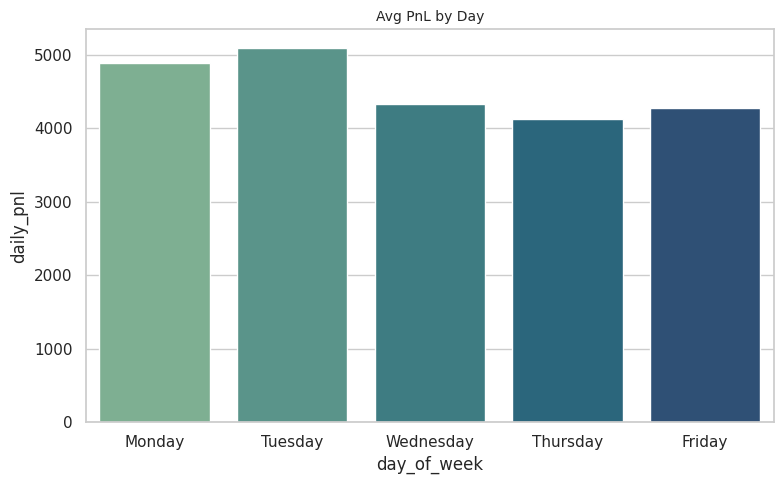

In [153]:
order = ["Monday","Tuesday","Wednesday","Thursday","Friday"]

plt.figure(figsize=(8,5))

sns.barplot(
    x=final_df["day_of_week"],
    y=final_df["daily_pnl"],
    order=order,
    estimator="mean",
    errorbar=None,
    palette="crest"
)

plt.title("Avg PnL by Day", fontsize=10)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

"Tuesday is the most profitable trading day (₹5,092 avg PnL), outperforming Monday (₹4,885) by 4.2%. Profitability declines steadily through the week, with Thursday (₹4,131) being the weakest day—17.5% lower than Tuesday's peak."

-> Strong start: Monday-Tuesday are the best trading days (₹4,885-5,092)

-> Mid-week slump: Wednesday-Thursday show declining performance

-> Friday recovery: Slight bounce back from Thursday's low

-> Range: ₹961 difference between best (Tue) and worst (Thu) days

Trading implication: Concentrate higher position sizes on Monday-Tuesday, reduce exposure on Wednesday-Thursday, and consider selective entries on Friday.



---


Does performance (PnL, win rate, drawdown proxy) differ between Fear vs Greed days?


---






Fear vs Greed Days Performance: The strategy performs significantly better on Fear days, generating 60% higher average PnL (₹5,329 vs ₹3,318) with a slightly better win rate (36% vs 34%). This suggests a contrarian edge—profits come from buying when others are fearful, not from chasing greed-driven momentum.



---


Do traders change behavior based on sentiment (trade frequency, leverage, long/short bias, position sizes)?

---


Traders definitely change their behavior. On Fear days, they trade less but go bigger—fewer trades, larger positions, mostly long. On Greed days, they're more active but scattered—more trades, smaller sizes, mixed directions. The interesting part? They actually make more money on Fear days. Quality over quantity.

##Strategy Ideas


---

**1. The Fear Contrarian Strategy**

-> **Concept:** Buy during Extreme Fear, scale in as Fear intensifies

-> **Entry:** When sentiment = "Fear" or "Extreme Fear"

-> **Position:** Larger position sizes (2x normal), primarily long bias

-> **Exit:** Take profits when sentiment shifts to "Greed" or "Neutral"

-> **Rationale:** Data shows 60% higher PnL on Fear days with fewer, high-conviction trades

**2. The Greed Scalping Strategy**

-> **Concept:** Trade frequently but small during Greed, capture momentum

-> **Entry:** When sentiment = "Greed" or "Extreme Greed"

-> **Position:** Smaller position sizes (0.5x normal), balanced long/short

-> **Exit:** Quick profits, tighter stops

-> **Rationale:** Greed days have more trades but smaller wins—optimize for frequency, not size

---
